In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append("../../project_functions/")
from matplotlib import pyplot as plt
import ad_functions as adfns
import sipa_rep_functions as sf
import sipa09_functions as s9fns
import pytesseract
import cv2
import numpy as np
import pandas as pd
import os
import shutil
from icecream import ic

# psm 6 = Assume a single uniform block of text.
config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 7 digits'

In [4]:
from reportlab.lib.pagesizes import A4, landscape
from reportlab.platypus import Table
from reportlab.pdfgen import canvas


In [5]:
print(os.getcwd())

d:\MTU\_Project_Grunt_Work\pdf_generator\sipa_09


In [6]:
file_path = "./cropped_images/9/"
file_list = os.listdir(file_path)

file_list, len(file_list)

(['S09_F01_Cropped.png',
  'S09_F02_Cropped.png',
  'S09_F03_Cropped.png',
  'S09_F04_Cropped.png',
  'S09_F05_Cropped.png',
  'S09_F06_Cropped.png',
  'S09_F07_Cropped.png',
  'S09_F08_Cropped.png',
  'S09_F09_Cropped.png',
  'S09_F10_Cropped.png',
  'S09_F11a_Cropped.png',
  'S09_F11b_Cropped.png',
  'S09_F12_Cropped.png',
  'S09_F13_Cropped.png',
  'S09_F14_Cropped.png',
  'S09_F15_Cropped.png',
  'S09_F16_Cropped.png',
  'S09_F17_Cropped.png',
  'S09_F18_Cropped.png',
  'S09_F19_Cropped.png'],
 20)

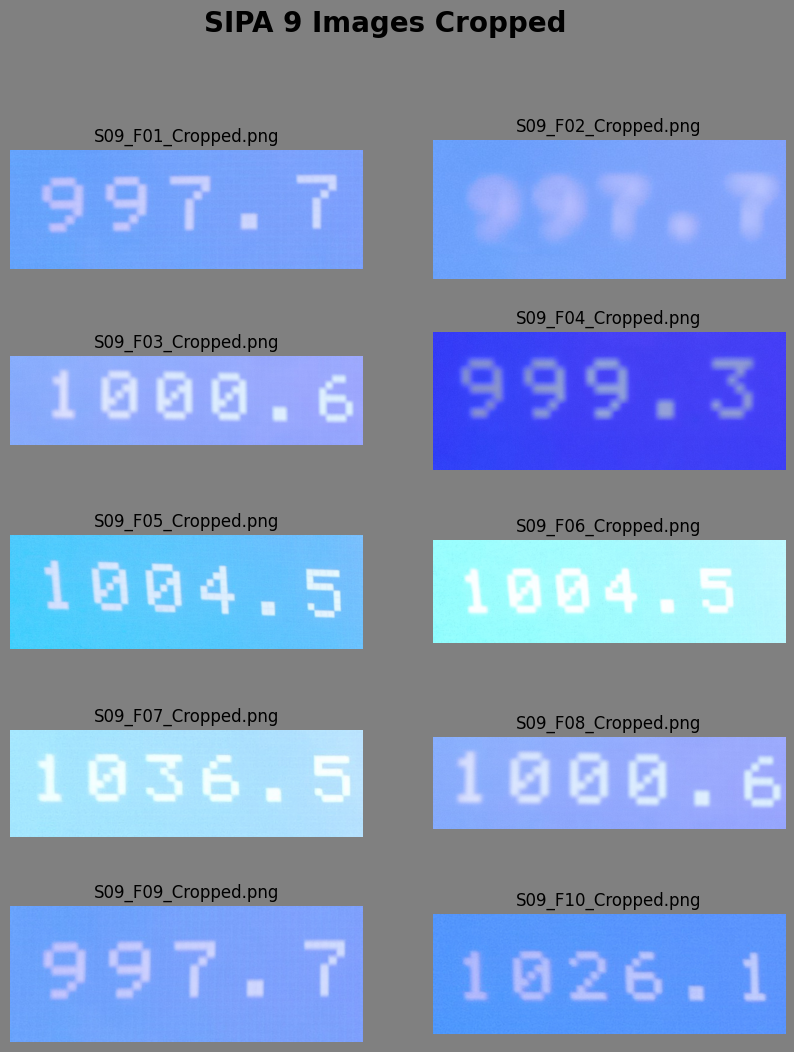

In [7]:
adfns.display_ten_images(file_path, "SIPA 9 Images Cropped")

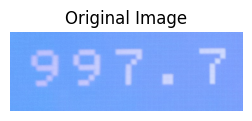

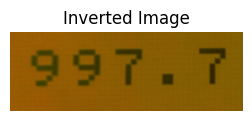

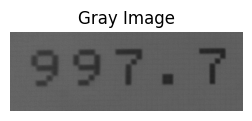

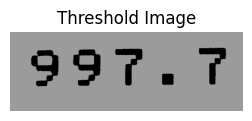

Text in Threshold Image:  997.7
SSD in Threshold Image:  9297.7
English in Threshold Image:  997.7
Dot Matrix in Threshold Image:  997


In [15]:
image_path = "./cropped_images/9/S09_F01_cropped.png"



# Load the image
img = cv2.imread(image_path)
adfns.show_img(img, size=3, title="Original Image")

inverted_img = cv2.bitwise_not(img)
adfns.show_img(inverted_img, size=3, title="Inverted Image")

gray_img = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2GRAY)
adfns.show_img(gray_img, size=3, title="Gray Image")

thresh_img = cv2.threshold(gray_img, 80, 155, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
adfns.show_img(thresh_img, size=3, title="Threshold Image")

text_lets_thresh, text_ssd_thresh, text_eng_thresh, text_dotmatrix_thresh  = adfns.get_text_lets(thresh_img)

print("Text in Threshold Image: ", text_lets_thresh)
print("SSD in Threshold Image: ", text_ssd_thresh)
print("English in Threshold Image: ", text_eng_thresh)
print("Dot Matrix in Threshold Image: ", text_dotmatrix_thresh)


## Sipa 09 Report Generation

In [8]:
adfns.delete_file("sipa_09_report.pdf")


# create a canvas object with A4 landscape page size
pdf = canvas.Canvas("sipa_09_report.pdf", pagesize=landscape(A4))
pdf.setTitle('SIPA 9 Tesseract Conversion Report')

height, width = A4

# set the fill color of the canvas to light grey
pdf.setFillColorRGB(0.8, 0.8, 0.8)

# draw a rectangle to fill the entire page
pdf.rect(0, 0, width, height, fill=True, stroke=False)



heightList = [
    height * 15 / 100, # header
    height * 80 / 100, # body
    height * 5  / 100, # footer
]

horizontalPadding   = 10
verticalPadding     = 10

body_horizontal_padding = 30

length      = len(file_list)
chunckSize  = 2 # number of elements per page



image_matrix = np.empty((0, 7, 300, 300, 3), dtype=np.uint8)
for startIdx in range(0, length, chunckSize):

    endIdx = startIdx + chunckSize
    _data = file_list[startIdx:endIdx]
    image_matrix, digits_matrix = s9fns.get_sipa09_images(_data, file_path)

    mainTable = Table([
        [sf.genHeaderTable(width, heightList[0], "SIPA 09 Image Processing Report")],
        [sf.s09_genBodyTable(width - body_horizontal_padding, heightList[1], image_matrix, digits_matrix, _data, chunckSize)],
        [sf.genFooterTable(width, heightList[2])],
    ],

    colWidths=width,
    rowHeights=heightList
    )
    mainTable.setStyle([
        # ('GRID', (0, 0), (-1, -1), 5, 'red'),
        ('VALIGN', (0, 1), (0, 1), 'TOP'),  # vertical align
        ('BOTTOMPADDING', (0, 0), (-1, -1), 0),
        ('LEFTPADDING', (0, 0), (-1, -1), 0),
        # ('LEFTPADDING', (1, 1), (-1, 1), 80), # body horizontal padding
        ('BOTTOMPADDING', (0, 1), (-1, 1), 40),
        ('TOPPADDING', (0, 1), (-1, 1), 15),
        # ('ALIGN', (0, 1), (-1,0), 'CENTER'),
        # ('RIGHTPADDING', (1, 0), (1, -1), 40),
        # ('LEFTPADDING', (1, 0), (1, 0), body_horizontal_padding / 2),
    ])


    mainTable.wrapOn(pdf, 0, 0)
    mainTable.drawOn(pdf, 0, 0)
    pdf.showPage()

pdf.save()


sipa_09_report.pdf has been deleted.


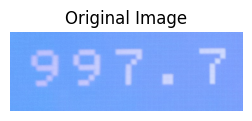

Text with OEM 0:
99?.?



Text with OEM 1:
997 7



Text with OEM 2:
997 -7



Text with OEM 3:
997 -7





In [32]:
image_path = "./cropped_images/9/S09_F01_cropped.png"

config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 7 digits'

# Load the image
img = cv2.imread(image_path)
adfns.show_img(img, size=3, title="Original Image")

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Read the image with Tesseract using different OEM values
for oem in range(4):
    config = f"--tessdata-dir ./ttesseract_langs --oem {oem} --psm 6"  # Change PSM value if necessary
    text = pytesseract.image_to_string(gray_image, config=config)
    print(f"Text with OEM {oem}:")
    print(text)
    print("\n" + "="*40 + "\n")